# Números de punto flotante
Los números reales se almacenan como números flotantes. Los números de punto flotante son números como $\pi \approx 3.141 592 6$, o el número de Avogadro $\approx 6.03 × 10^{23}$, o la carga de un electrón $\approx 1.602 1773 3 × 10 ^{-19} $ coulombs.

Estos tienen la forma

$$±x \times b ^e$$

donde $x$, las cifras significativas o *mantisa*, *e* es el exponente y *b* es la base del sistema de punto flotante. Si la mantisa está en el rango de 1 a m, entonces tiene la forma

$$x = x_0x_1 x_2 x_3 . . . x_{m−1}$$

en base b donde cada $x_i$ es un dígito de base-b (0, 1, 2, . . . , b − 1) y m es la longitud de la mantisa.

La longitud de la mantisa describe con qué precisión se pueden aproximar los números. Ya que

$$x \times b^e = (x_0x_1 x_2 x_3 . . . x_{m−1} \text{ base b) }\times b^e$$
$$= (x_0 + x_1 b^{ −1} + x_2 b^{−2 }+ x_3 b^{−3 }+ · · · + x_{m−1} b^{ −m+1} )\times b^e .$$



El sistema de punto flotante más conocido y más utilizado es el **sistema de punto flotante IEEE**, que a veces se denomina estándar IEEE 754.

Esto especifica un conjunto de tres formatos diferentes de punto flotante: *precisión simple*, *precisión doble* y *precisión extendida*.

La mayoría de los lenguajes de programación admiten sistemas de punto flotante de precisión simple y doble. Por lo general, los tipos real o float representan números de precisión simple, mientras que los tipos double, double precision o long real/longreal representan números de precisión doble.


**El redondeo de unidades**, denotado por $u$ y es el número positivo más pequeño donde el valor calculado de
$1 + u$ es diferente de 1.

**El épsilon de la máquina** es el $a − 1$ más pequeño, donde $a$ es el número representable más pequeño mayor que 1. Denotamos el épsilon de la máquina con $\epsilon_{MATCH}$. En aritmética binaria con redondeo normalmente tenemos $\epsilon_{MATCH}=2u.$

Para aritmética decimal de cuatro dígitos:
Si sumamos 

$$1.000 + 0.0001$$

exactamente obtendríamos 

$$1.0001$$

Pero si solo podemos almacenar tres dígitos decimales, tendríamos que eliminar el último dígito: 

$$1.000$$

Para obtener un valor diferente de 1,000 en el resultado, tendríamos que sumar al menos 0,0005 y luego redondear 1,0005 hasta 1,001 antes de almacenar.

Para la aritmética decimal de dos dígitos con redondeo obtendríamos $$u = 0.0005 = 5 × 10 ^{−4}$$

El menor número representable > 1 es 

$$1.001 = 1 + 2 u.$$

Podemos determinar el valor de $\epsilon_{MATCH}$ encontrando el valor de $ \frac{1}{2^p}$ tal que a la computadora

$1,0+\frac{1}{2^p}=1,0$

In [1]:
def epsilon_mach_f():

    emach_f = float(1.0 ) 
    test_f =  float(1.0 + emach_f)
    while (1.0 != test_f):
        emach_f = emach_f/2
        test_f = 1.0 + emach_f
    return emach_f

emach_f = epsilon_mach_f()

print('e_{mach} = ', emach_f, ' of type ', type(emach_f))

e_{mach} =  1.1102230246251565e-16  of type  <class 'float'>


In [2]:
from numpy import double
def epsilon_mach_f():

    emach_f = double(1.0)  
    test_f =  double(1.0 + emach_f)
    while (1.0 != test_f):
        emach_f = emach_f/2
        test_f = 1.0 + emach_f
    return emach_f

emach_f = epsilon_mach_f()
print('e_{mach} = ', emach_f, ' of type ', type(emach_f))

e_{mach} =  1.1102230246251565e-16  of type  <class 'numpy.float64'>


**Rango de los números de punto flotante:** ¿cuáles son los números de punto flotante más grande y más pequeño?

Esto depende del rango del exponente. Si $−e_{max} \leq e \leq +e_{max}$ y $1/b \leq x < 1$,
entonces el número representable más grande está cerca de $b^{e_{max}}$ y el número representable más pequeño es $b^{ −e_ {max} −1}$. Por lo general, se da $b^{e_{ max}}$ para indicar el rango de los números de punto flotante.

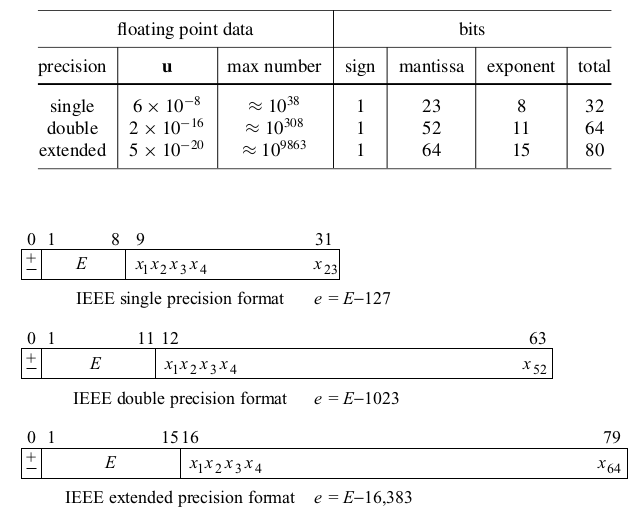

In [3]:
from IPython.display import Image
Image("Images/fp.png")

In [13]:
import numpy as np
print(2**10)
x = np.double(2**1023)
print(x)


1024
8.98846567431158e+307


In [12]:
print(2**10)
x = np.double(2**-1075)
x

1024


5e-324

## Overflow and underflow

Los formatos de coma flotante de **Overflow** usan un número fijo de bits, solo hay un número finito de números de coma flotante en un formato particular. Para cada formato específico hay un valor máximo que se puede representar, cuando tenemos números más grandes que esto,
tener desbordamiento.

¿Qué hacen las computadoras cuando hay Overflow? La respuesta más común es terminar el programa. Con la aritmética IEEE es posible devolver "infinito" como resultado (indicado por Inf).


**Underflow** ocurre cuando el resultado de una operación de punto flotante es demasiado pequeño para ser representado como un número de punto flotante. Esto puede suceder al multiplicar dos números muy pequeños o al dividir un número pequeño por un número muy grande.

Cuando ocurre un subdesbordamiento, la unidad generalmente devuelve cero, aunque en algunos sistemas el programa se bloquearía! 

In [15]:
import numpy as np
print(2**4)
print(2**15)
x = np.float16(2**15)
x = np.float16(2**16)
x

16
32768


inf

In [18]:
print(2**7)
print(2**127)
x = np.single(2**127)
#x = np.single(2**128)

print(x)

128
170141183460469231731687303715884105728
1.7014118e+38


In [20]:
print(2**10)
print(2**1023)
x = float(2**1023)
x = float(2**1024)
print(x)

1024
89884656743115795386465259539451236680898848947115328636715040578866337902750481566354238661203768010560056939935696678829394884407208311246423715319737062188883946712432742638151109800623047059726541476042502884419075341171231440736956555270413618581675255342293149119973622969239858152417678164812112068608


OverflowError: int too large to convert to float

In [24]:
print(2**10)
print(2**1023)
x = np.double(2**1023)
x = np.double(2**1024)
#x = np.longdouble(2**1024)
print(x)

1024
89884656743115795386465259539451236680898848947115328636715040578866337902750481566354238661203768010560056939935696678829394884407208311246423715319737062188883946712432742638151109800623047059726541476042502884419075341171231440736956555270413618581675255342293149119973622969239858152417678164812112068608


OverflowError: int too large to convert to float

In [26]:
print(2**1023)
x = np.longdouble(2**1023)
x = np.longdouble(2**1024)
print(x)

89884656743115795386465259539451236680898848947115328636715040578866337902750481566354238661203768010560056939935696678829394884407208311246423715319737062188883946712432742638151109800623047059726541476042502884419075341171231440736956555270413618581675255342293149119973622969239858152417678164812112068608
inf


C:\Users\gbdiaz\AppData\Local\Temp/ipykernel_19676/3438114056.py:3: RuntimeWarning: overflow encountered in conversion from python long
  x = np.longdouble(2**1024)


In [30]:
x = float(2**-1075)
x = float(2**-1076)
x = double(2**-1075)
x = double(2**-2047)
x

0.0

Se debe evitar el overflow. Afortunadamente, el número máximo en sistemas de punto flotante bien diseñados como la aritmética IEEE es realmente muy grande (≈ $10^{38}$ para precisión simple, ≈ $10^{307}$ en precisión doble).

Es difícil dar límites precisos sobre cuándo ocurrirá el desbordamiento en los cálculos más realistas, pero algunas cosas obviamente pueden causar problemas: por ejemplo, tomar exponenciales de números positivos grandes son números muy grandes; multiplicar números grandes da números aún más grandes. Un ejemplo es la función tanh que se puede expresar por
el cociente
$$tanh(x) =\frac{e^{+x}-e^{-x}}{e^{+x}+e^{-x}}$$

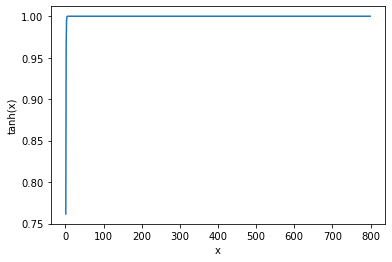

In [36]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(1,800)
y = np.zeros(len(x))
for i in x:
    y[i-1] = np.tanh(i)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.show()

In [34]:
from math import exp
def tanh(x):
    return (exp(x)-exp(-x))/(exp(x)+exp(-x))

tanh(90)
tanh(750)

OverflowError: math range error

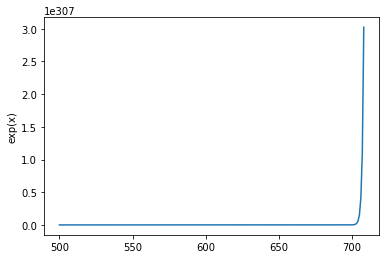

In [35]:
x = np.arange(500,709)
y = np.zeros(len(x))
s = 0
for i in x:
    y[s] = exp(i)
    s += 1
plt.plot(x,y)
plt.ylabel('exp(x)')
plt.show()

## Cancelación catastrófica
La cancelación catastrófica es probablemente la fuente más común de problemas numéricos.

Esto puede ocurrir cuando se restan cantidades casi iguales: c := a − b donde a ≈ b.

El problema es que normalmente a se calcula como $a = (1 + \epsilon_1)a$ y b normalmente se calcula como $b = (1 + \epsilon_2)b$. Tanto $\epsilon_1$ como $\epsilon_2$ son pequeños, típicamente $\epsilon_1$, $\epsilon_2\leq u$.
Entonces el valor calculado de c es

$$\hat{c} = a-b= (1 + \epsilon_3)[(1 + \epsilon_1)a-(1 + \epsilon_2)b]$$
$$=(1 + \epsilon_3)[a-b]+(1 + \epsilon_3)[\epsilon_1a- \epsilon_2b]$$

Si |a − b| es mucho menor que |a| y |b| entonces |$\epsilon_1a- \epsilon_2b$| puede ser mayor que |a − b|
si $\epsilon_1$ y $\epsilon_2$ tienen signos opuestos (de modo que el error suma en lugar de restar). Él
el error en c todavía es pequeño, pero su error relativo $| \hat{c} − c|/|c| $ puede ser bastante grande. Si luego dividimos por un número pequeño, podemos obtener grandes errores.

Supongamos que queremos calcular la media y la varianza de algunos datos de prueba en una lista $a_1 , a_2 , . . . , un_n$.

Es decir,

$$\bar{a}=\frac{1}{n}\sum_{i=1}^n a_i$$

Varianza (dos pasos)

$$v=\frac{1}{n-1}\sum_{i=1}^n (a_i-\bar{a})^2$$

Varianza (un paso)

$$v=\frac{1}{n-1}\left[\sum_{i=1}^n a_i^2-n\bar{a}^2\right]$$

La segunda fórmula para la varianza es muy popular ya que podemos usarla para calcular la media y la desviación estándar en un solo paso a través de los datos.

Por otro lado, si usáramos la primera fórmula para la varianza, primero tendríamos que calcular la media y luego calcular la varianza en el segundo paso a través de los datos.

Sin embargo, la segunda fórmula tiene algunos problemas numéricos ocultos si los datos de entrada son bastante grandes.

In [38]:
# Example
x = [7,
     4,
     9,
     3,
     0,
     9]

def var2(x):
    n = len(x)
    mean_x = sum(x)/n
    s = 0
    for i in range(n):
        s += (x[i]-mean_x)**2
    var = s/(n-1)
    return mean_x, var 
m2, v2 = var2(x)
print("mean_2 = ",m2)
print("var_2 = ",v2)

def var1(x):
    n = len(x)
    mean_x = sum(x)/n
    print("mean:",mean_x)
    s = 0
    for i in range(n):
        s += (x[i]**2-n*mean_x**2)
        #print("s: ",s)
    var = s/(n-1)
    return mean_x, var 
m1, v1 = var1(x)
print("mean_1 = ",m1)
print("var_1 = ",np.sqrt(abs(v1)))


mean_2 =  5.333333333333333
var_2 =  13.066666666666666
mean: 5.333333333333333
mean_1 =  5.333333333333333
var_1 =  12.553883861180172


In [39]:
# Example
x = [343215624.75,
     343215624.48,
     343215624.90,
     343215624.31,
     343215624.05,
     343215624.98]

def var2(x):
    n = len(x)
    mean_x = sum(x)/n
    s = 0
    for i in range(n):
        s += (x[i]-mean_x)**2
    var = s/(n-1)
    return mean_x, var 
m2, v2 = var2(x)
print("mean_2 = ",m2)
print("var_2 = ",v2)

def var1(x):
    n = len(x)
    mean_x = sum(x)/n
    #print("mean:",mean_x)
    s = 0
    for i in range(n):
        s += (x[i]**2-n*mean_x**2)
        #print("x[i]**2: ",x[i]**2)
        #print("n*mean_x**2: ",n*mean_x**2)
    var = s/(n-1)
    return mean_x, var 
m1, v1 = var1(x)
print("mean_1 = ",m1)
print("var_1 = ",np.sqrt(abs(v1)))


mean_2 =  343215624.5783333
var_2 =  0.13101666313807242
mean_1 =  343215624.5783333
var_1 =  840703151.9675496


La razón es la cancelación catastrófica en $\sum_{i=1}^n a_i^2-n\bar{a}^2$, donde la suma de los cuadrados tiene una magnitud cercana a $n\bar{a}^2$.

Para obtener una estimación aproximada de los errores de redondeo, supongamos que
$\sum_{i=1}^n a_i^2-n\bar{a}^2$ y $n\bar{a} ^2$ se calculan exactamente.
Entonces el error que esperamos en la diferencia se puede aproximar por

$$u n\bar{a}^2 ≈ 2 \times 10^{−16} × 6 × (3,4 \times 10^{8} )^2 ≈ 138$$

Esto luego se divide por n − 1 = 5 para dar una estimación de error para la varianza de alrededor de 28, que
es mucho mayor que la varianza verdadera. Esto significa que esta estimación de la varianza
es casi enteramente un error.

In [41]:
2e-16*6*(3.4e1)**2

1.3872e-12

El algoritmo de dos pasos también tiene cancelación, pero los errores son mucho más pequeños porque $a_ i$s y $\bar{a}$ son mucho más pequeños que a 2 . El error en $(a_i − \bar{a})$ se puede estimar aproximadamente mediante $u |\bar{a}|$, por lo que el error en $(a_i − \bar{a})^2$ se puede estimar aproximadamente estimado por

$$2|(a_i − \bar{a})|u|\bar{a}|.$$

  Esto da un error en la varianza que podemos estimar por
 
$$2nmax|(a_i − \bar{a})||\bar{a}|u.$$

Entonces obtenemos una estimación de error de aproximadamente

$$ 2 * 6 * 0,53 \times 10^{−16} * 3,4 \times 10^{8} $$

In [42]:
2*6*0.53e-16*(3.4e8)

2.1623999999999998e-07

## Estabilidad numérica


Gran parte del mal comportamiento numérico se puede atribuir a una solo operación, pero no siempre, a veces es problema del algoritmo. Tomemos por ejemplo el problema siguente

$$I _k := \int_0 ^1 x^k e^{−x} dx \quad para k = 0, 1, 2, . . . .$$

Podemos mostrar que

$$I_k = k I_{k−1} − e^{ −1} \quad k = 1, 2, . . . , \quad I_0 = 1 − e^{ −1} .$$

De la primera fórmula para $I_k$ es fácil ver que $I_k > I_{k+1} > 0.$

El siguiente algoritmo es correcto, pero no estable.

In [43]:
N = 20
I = np.zeros(N)

I[0] = 1.0 - exp(-1.0)
for k in np.arange(1,N):
    I[k] = k*I[k-1] - exp(-1.0)
    print("I[{}] = {}".format(k,I[k]))

I[1] = 0.26424111765711533
I[2] = 0.16060279414278833
I[3] = 0.11392894125692266
I[4] = 0.08783632385624829
I[5] = 0.07130217810979911
I[6] = 0.059933627487352314
I[7] = 0.05165595124002387
I[8] = 0.045368168748748605
I[9] = 0.04043407756729511
I[10] = 0.03646133450150879
I[11] = 0.033195238345154365
I[12] = 0.03046341897041005
I[13] = 0.028145005443888316
I[14] = 0.026150635042994086
I[15] = 0.024380084473468955
I[16] = 0.022201910404060943
I[17] = 0.009553035697593693
I[18] = -0.19592479861475587
I[19] = -4.090450614851804


La inestabilidad numérica parece aparecer muy rápidamente, pero si la examinamos de cerca, podemos ver que I[17] tiene aproximadamente la mitad del valor de I[16], e incluso I[16] es quizás demasiado pequeño.

Cuando el error se amplifica en 16 o más con cada iteración, incluso
los errores muy pequeños pueden volverse grandes en unas pocas iteraciones.

Este es un ejemplo de inestabilidad numérica que no se manifiesta en uno, dos, tres o incluso diez pasos. Pero se hace evidente y eventualmente abruma los resultados calculados.

En este caso, el problema se puede solucionar invirtiendo la iteración:
 
 $$I_{n−1} = (I_ n + e^{ −1 })/n \quad para \quad n = . . . , 3, 2, 1.$$

El problema ahora es empezar. No sabemos “I ∞ ”, e incluso si lo supiéramos, llevaría una cantidad infinita de tiempo hacer los cálculos.

Pero dado que el error se reduce rápidamente, podemos comenzar con una muy
valor aproximado de (digamos) $I_{30} ≈ e ^{−1} /30$ lo que significa que el error en $I_{20}$ con este método inverso es de $e ^{−1} /(30 × 29 × 28 × · · · × 21) ≈ 9 × 10 −16$, que es una precisión casi total de doble precisión.

In [44]:
N = 30
I = np.zeros(N+1)

I[30] =  exp(-1.0)/30
for k in np.arange(N-1,0,-1):
    I[k] = (I[k+1] + exp(-1.0))/N
    print("I[{}] = {}".format(k,I[k]))

I[29] = 0.012671402973683014
I[28] = 0.012685028138170846
I[27] = 0.01268548231032044
I[26] = 0.012685497449392093
I[25] = 0.012685497954027814
I[24] = 0.012685497970849004
I[23] = 0.012685497971409712
I[22] = 0.012685497971428402
I[21] = 0.012685497971429026
I[20] = 0.012685497971429045
I[19] = 0.012685497971429045
I[18] = 0.012685497971429045
I[17] = 0.012685497971429045
I[16] = 0.012685497971429045
I[15] = 0.012685497971429045
I[14] = 0.012685497971429045
I[13] = 0.012685497971429045
I[12] = 0.012685497971429045
I[11] = 0.012685497971429045
I[10] = 0.012685497971429045
I[9] = 0.012685497971429045
I[8] = 0.012685497971429045
I[7] = 0.012685497971429045
I[6] = 0.012685497971429045
I[5] = 0.012685497971429045
I[4] = 0.012685497971429045
I[3] = 0.012685497971429045
I[2] = 0.012685497971429045
I[1] = 0.012685497971429045
